**STATISTICS ASSIGNMENT-4**

Name: Om J. Gaydhane

DIV       : D11AD 

Roll No : 15

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import csv
from statistics import mode
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('stats.csv')

In [ ]:
df
X = df['Sr_No_of_word']
X

0        1
1        2
2        3
3        4
4        5
      ... 
263    264
264    265
265    266
266    267
267    268
Name: Sr_No_of_word, Length: 268, dtype: int64

In [ ]:
Y = df['Letters_in_word']
Y

0      4
1      5
2      3
3      5
4      5
      ..
263    3
264    6
265    4
266    3
267    5
Name: Letters_in_word, Length: 268, dtype: int64

**Q1.**

         Find Mean, Mode, Median, Variance, Standard Deviation of the above population.

In [ ]:
file = open("GA.csv", "r")
data = list(csv.reader(file, delimiter = ","))

In [ ]:
print(data)
float_list = list(np.float_(data))
v = np.array(float_list)

[['4'], ['5'], ['3'], ['5'], ['5'], ['3'], ['3'], ['7'], ['7'], ['5'], ['4'], ['4'], ['9'], ['1'], ['3'], ['6'], ['9'], ['2'], ['7'], ['3'], ['9'], ['2'], ['3'], ['11'], ['4'], ['3'], ['3'], ['3'], ['7'], ['5'], ['3'], ['2'], ['3'], ['7'], ['2'], ['1'], ['5'], ['5'], ['3'], ['7'], ['7'], ['4'], ['6'], ['2'], ['3'], ['6'], ['2'], ['9'], ['3'], ['2'], ['9'], ['3'], ['4'], ['6'], ['2'], ['3'], ['3'], ['2'], ['1'], ['5'], ['11'], ['2'], ['4'], ['3'], ['2'], ['4'], ['4'], ['2'], ['8'], ['1'], ['7'], ['2'], ['4'], ['5'], ['2'], ['1'], ['5'], ['7'], ['5'], ['3'], ['5'], ['3'], ['4'], ['4'], ['5'], ['5'], ['4'], ['4'], ['6'], ['5'], ['4'], ['2'], ['2'], ['10'], ['7'], ['3'], ['6'], ['4'], ['2'], ['5'], ['2'], ['4'], ['3'], ['2'], ['1'], ['6'], ['5'], ['2'], ['6'], ['8'], ['2'], ['6'], ['10'], ['2'], ['6'], ['6'], ['4'], ['6'], ['3'], ['5'], ['3'], ['6'], ['3'], ['4'], ['3'], ['9'], ['4'], ['4'], ['11'], ['2'], ['3'], ['5'], ['3'], ['4'], ['5'], ['2'], ['3'], ['2'], ['7'], ['3'], ['5'], ['4'], 

In [ ]:

print("Mean: ",v.mean()) 
print("Standard Deviation: ",v.std())
df1 = pd.DataFrame(float_list)
print("Mode: ",df1.mode())
print("Median: ",statistics.median(float_list))
print("Variance: ",np.var(float_list))

Mean:  4.291044776119403
Standard Deviation:  2.1171814087125567
Mode:       0
0  4.0
Median:  [4.]
Variance:  4.482457117398085


**Q2.**

         Find 10th, 25th, 50th, 75th , 90th percentile for the above data.

In [ ]:
arr = np.array(float_list)
print("10th percentile of arr : ",np.percentile(arr, 10))
print("25th percentile of arr : ",np.percentile(arr, 25))
print("50th percentile of arr : ",np.percentile(arr, 50))
print("75th percentile of arr : ",np.percentile(arr, 75))
print("90th percentile of arr : ",np.percentile(arr, 90))

10th percentile of arr :  2.0
25th percentile of arr :  3.0
50th percentile of arr :  4.0
75th percentile of arr :  5.0
90th percentile of arr :  7.0


**Q3.**

        Plot Bar chart & Histogram for the above population.

<BarContainer object of 268 artists>

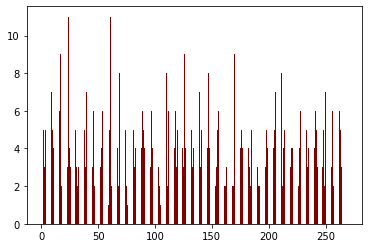

In [ ]:
plt.bar(X,Y,color ='maroon',width = 0.4)

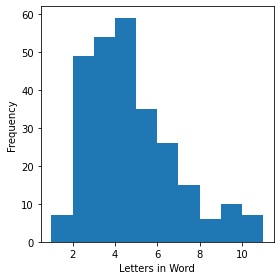

In [ ]:
ax = (Y).plot.hist(figsize=(4, 4))
ax.set_xlabel('Letters in Word')

plt.tight_layout()
plt.show()

**Q4.**


         Plot Scattered Plot for above population. 
         Find correlation coefficient between Col-1 & Col-2.

In [ ]:
print(df.corr())

                 Sr_No_of_word  Letters_in_word
Sr_No_of_word         1.000000        -0.033693
Letters_in_word      -0.033693         1.000000


In [ ]:
df.corr()

,Sr_No_of_word,Letters_in_word
Sr_No_of_word,1.000000,-0.033693
Letters_in_word,-0.033693,1.000000


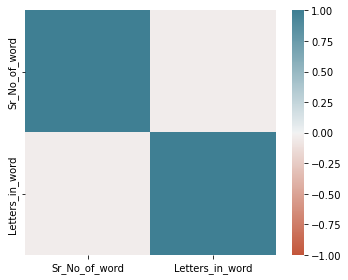

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

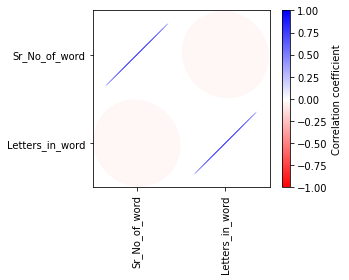

In [ ]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec, ax

m, ax = plot_corr_ellipses(df.corr(), figsize=(5, 4), cmap='bwr_r')
cb = fig.colorbar(m, ax=ax)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()

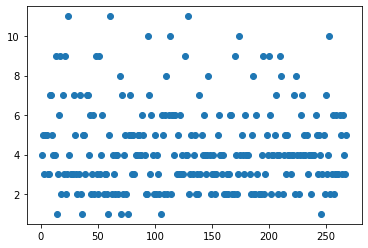

In [ ]:
plt.scatter(X,Y)

**Q5.**

        Draw box plot for above population.

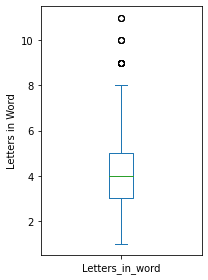

In [ ]:
ax = (Y).plot.box(figsize=(3, 4))
ax.set_ylabel('Letters in Word')
plt.tight_layout()
plt.show()

**Q6.**

    Prints word numbers whose
        a. Letters are less than or equal to 4
        b. Letters are less than or equal to 10

In [ ]:
#a.
for i in v:
  if i < 5:
    print(X[i])

4.0    5
Name: Sr_No_of_word, dtype: int64
3.0    4
Name: Sr_No_of_word, dtype: int64
3.0    4
Name: Sr_No_of_word, dtype: int64
3.0    4
Name: Sr_No_of_word, dtype: int64
4.0    5
Name: Sr_No_of_word, dtype: int64
4.0    5
Name: Sr_No_of_word, dtype: int64
1.0    2
Name: Sr_No_of_word, dtype: int64
3.0    4
Name: Sr_No_of_word, dtype: int64
2.0    3
Name: Sr_No_of_word, dtype: int64
3.0    4
Name: Sr_No_of_word, dtype: int64
2.0    3
Name: Sr_No_of_word, dtype: int64
3.0    4
Name: Sr_No_of_word, dtype: int64
4.0    5
Name: Sr_No_of_word, dtype: int64
3.0    4
Name: Sr_No_of_word, dtype: int64
3.0    4
Name: Sr_No_of_word, dtype: int64
3.0    4
Name: Sr_No_of_word, dtype: int64
3.0    4
Name: Sr_No_of_word, dtype: int64
2.0    3
Name: Sr_No_of_word, dtype: int64
3.0    4
Name: Sr_No_of_word, dtype: int64
2.0    3
Name: Sr_No_of_word, dtype: int64
1.0    2
Name: Sr_No_of_word, dtype: int64
3.0    4
Name: Sr_No_of_word, dtype: int64
4.0    5
Name: Sr_No_of_word, dtype: int64
2.0    3
Na

In [ ]:
for j in v:
  if j < 11:
    print(X[j])

4.0    5
Name: Sr_No_of_word, dtype: int64
5.0    6
Name: Sr_No_of_word, dtype: int64
3.0    4
Name: Sr_No_of_word, dtype: int64
5.0    6
Name: Sr_No_of_word, dtype: int64
5.0    6
Name: Sr_No_of_word, dtype: int64
3.0    4
Name: Sr_No_of_word, dtype: int64
3.0    4
Name: Sr_No_of_word, dtype: int64
7.0    8
Name: Sr_No_of_word, dtype: int64
7.0    8
Name: Sr_No_of_word, dtype: int64
5.0    6
Name: Sr_No_of_word, dtype: int64
4.0    5
Name: Sr_No_of_word, dtype: int64
4.0    5
Name: Sr_No_of_word, dtype: int64
9.0    10
Name: Sr_No_of_word, dtype: int64
1.0    2
Name: Sr_No_of_word, dtype: int64
3.0    4
Name: Sr_No_of_word, dtype: int64
6.0    7
Name: Sr_No_of_word, dtype: int64
9.0    10
Name: Sr_No_of_word, dtype: int64
2.0    3
Name: Sr_No_of_word, dtype: int64
7.0    8
Name: Sr_No_of_word, dtype: int64
3.0    4
Name: Sr_No_of_word, dtype: int64
9.0    10
Name: Sr_No_of_word, dtype: int64
2.0    3
Name: Sr_No_of_word, dtype: int64
3.0    4
Name: Sr_No_of_word, dtype: int64
4.0    5

**Q7.**

        Calculate Z-score for [4,5,6,6,6,7,8,12,13,13,14,18].

In [ ]:
values = [4,5,6,6,6,7,8,12,13,13,14,18]
mean = sum(values) / len(values)
differences = [(value - mean)**2 for value in values]
sum_of_differences = sum(differences)
standard_deviation = (sum_of_differences / (len(values) - 1)) ** 0.5
print(standard_deviation)
zscores = [(value - mean) / standard_deviation for value in values]
print(zscores)

4.458563432181702
[-1.1961999452194811, -0.9719124554908285, -0.7476249657621759, -0.7476249657621759, -0.7476249657621759, -0.5233374760335231, -0.2990499863048704, 0.5980999726097405, 0.8223874623383931, 0.8223874623383931, 1.0466749520670457, 1.9438249109816566]


**Q8.**


        Draw scattered plot & find correlation coefficient for the given data.

In [ ]:
st = pd.read_csv('stats2.csv')

In [ ]:
st

,x,y
0,14.2,215
1,16.4,325
2,11.9,185
3,15.2,332
4,18.5,406
5,22.1,522
6,19.4,412
7,25.1,614
8,23.4,544
9,18.1,421


In [ ]:
s = st['x']
t = st['y']

In [ ]:
st.corr()

,x,y
x,1.000000,0.984296
y,0.984296,1.000000


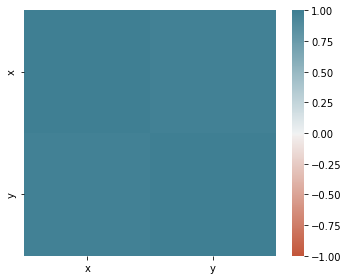

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(st.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

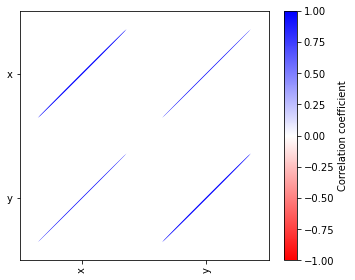

In [ ]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec, ax

m, ax = plot_corr_ellipses(st.corr(), figsize=(5, 4), cmap='bwr_r')
cb = fig.colorbar(m, ax=ax)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()

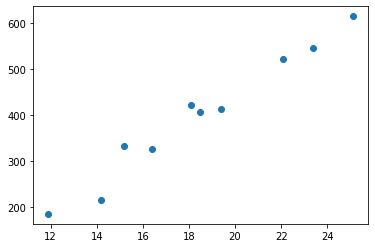

In [ ]:
plt.scatter(s,t)